In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Video
from matplotlib.animation import FFMpegFileWriter

In [4]:
G = nx.random_graphs.barabasi_albert_graph(10, 3, seed=1337)

In [21]:
pos = nx.layout.spring_layout(G)
pos

{0: array([-1.        ,  0.16559176]),
 1: array([-0.04488436, -0.26971332]),
 2: array([0.62723556, 0.24782046]),
 3: array([-0.19361233, -0.03582835]),
 4: array([ 0.31232212, -0.16228347]),
 5: array([0.27550699, 0.23256645]),
 6: array([-0.01181143, -0.67215828]),
 7: array([-0.00288634,  0.38443702]),
 8: array([0.49890846, 0.75924509]),
 9: array([-0.46077866, -0.64967736])}

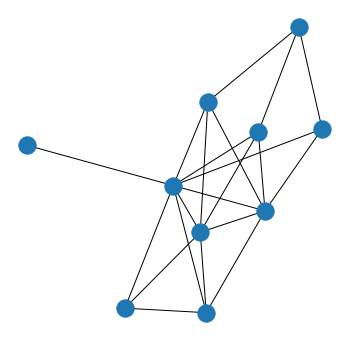

In [22]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw(G, ax=ax, pos=pos)

In [11]:
A = nx.adjacency_matrix(G)
A.shape

(10, 10)

In [14]:
start_vector = np.zeros(A.shape[0])
start_vector[np.random.randint(A.shape[0])] = 1
start_vector

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

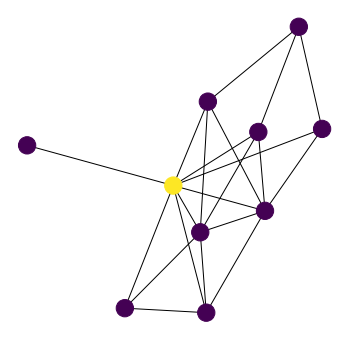

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw(G, pos=pos, ax=ax, node_color=start_vector)

In [19]:
A**3

<10x10 sparse matrix of type '<class 'numpy.intc'>'
	with 98 stored elements in Compressed Sparse Row format>

In [16]:
A.dot(start_vector)

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1.])

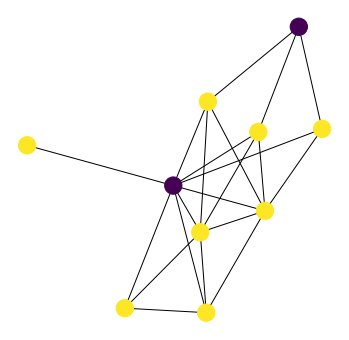

In [24]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw(G, pos=pos, ax=ax, node_color=A.dot(start_vector))

In [137]:
d_inv = 1/np.asarray(A.sum(-1)).ravel()

In [138]:
A = nx.adjacency_matrix(G)
print(A.shape)
start_vector = np.zeros(A.shape[0])

A.dot(start_vector * d_inv)

(10, 10)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [146]:
G = nx.random_graphs.barabasi_albert_graph(10, 1, seed=1337)
A = nx.adjacency_matrix(G)
d_inv = 1/np.asarray(A.sum(-1)).ravel()
#A = A / A.mean(axis=-1)
start_vector = np.zeros(A.shape[0])
start_vector[np.random.randint(A.shape[0])] = 1
#start_vector *= d_inv
print(f"{i}: {start_vector}")
for i in range(10):
    start_vector = (start_vector + (A.dot(start_vector) * d_inv))/2
    print(f"{i}: {start_vector}")

9: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
0: [0.     0.0625 0.     0.5    0.     0.     0.5    0.     0.     0.    ]
1: [0.03125  0.0625   0.03125  0.390625 0.03125  0.03125  0.5      0.03125
 0.03125  0.03125 ]
2: [0.046875   0.06933594 0.046875   0.3359375  0.046875   0.046875
 0.4453125  0.046875   0.046875   0.046875  ]
3: [0.05810547 0.07617188 0.05810547 0.29663086 0.05810547 0.05810547
 0.390625   0.05810547 0.05810547 0.05810547]
4: [0.06713867 0.08204651 0.06713867 0.26501465 0.06713867 0.06713867
 0.34362793 0.06713867 0.06713867 0.06713867]
5: [0.07459259 0.08695984 0.07459259 0.23892593 0.07459259 0.07459259
 0.30432129 0.07459259 0.07459259 0.07459259]
6: [0.08077621 0.09104705 0.08077621 0.21728325 0.08077621 0.08077621
 0.27162361 0.08077621 0.08077621 0.08077621]
7: [0.08591163 0.09444332 0.08591163 0.19930929 0.08591163 0.08591163
 0.24445343 0.08591163 0.08591163 0.08591163]
8: [0.09017748 0.09726483 0.09017748 0.18437883 0.09017748 0.09017748
 0.22188136 0.09017748 0.090177

In [52]:
from celluloid import Camera
from IPython.display import HTML

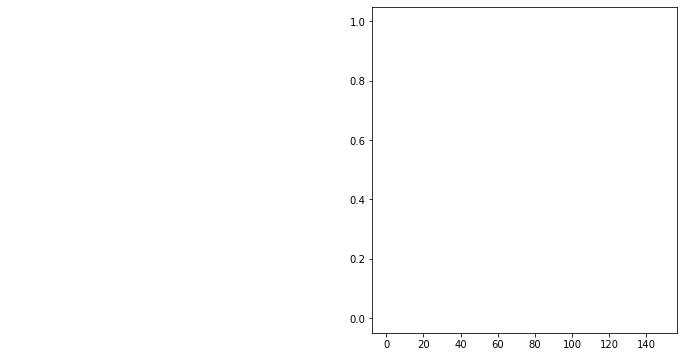

In [154]:
fig, ax = plt.subplots(1,2, sharex=False, sharey=False, figsize=(12,6))
camera = Camera(fig)
G = nx.random_graphs.barabasi_albert_graph(150, 1, seed=1337)
#G = nx.random_graphs.erdos_renyi_graph(150, 0.1)
pos = nx.layout.spring_layout(G)

A = nx.adjacency_matrix(G)
d_inv = 1/np.asarray(A.sum(-1)).ravel()

nx.draw(G, ax=ax[0], pos=pos, node_size=20, node_color="black", edge_color="black")
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
camera.snap()
start_vector = np.zeros(A.shape[0])
start_vector[np.random.randint(A.shape[0])] = 1
for i in range(20):
    ax[1].plot(start_vector>0, "ko")
    ax[0].text(xlim[0], ylim[1], f"i={i}")
    nx.draw(G, pos=pos, ax=ax[0], node_size=20, node_color=np.where(start_vector > 0, "r", "k"))
    camera.snap()
    start_vector = (start_vector + A.dot(start_vector)) > 0
    #start_vector = A.dot(start_vector) + start_vector
    #start_vector = (start_vector + (A.dot(start_vector) * d_inv))/2
animation = camera.animate()
HTML(animation.to_html5_video())